<a href="https://colab.research.google.com/github/rohithhhhhhhhhhh/EPICURIOUS-MACHINE-LEARNING/blob/main/Epicurious.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from warnings import filterwarnings
filterwarnings('ignore')


In [ ]:
data=pd.read_csv("epi_r.csv")

In [ ]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(20052, 680)

In [ ]:

data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

,0
title,0
rating,0
calories,4117
protein,4162
fat,4183
...,...
cookbooks,0
leftovers,0
snack,0
snack week,0


In [ ]:
data.calories.isnull().sum()

4117

In [ ]:
data=data[(data['calories']<10000) | (data['calories'].isnull()==1)]

In [ ]:
calMean=data.calories.mean()
calMean

487.9006535126304

In [ ]:
data.fillna(calMean,inplace=True)

In [ ]:
data.calories.describe()

,calories
count,20031.000000
mean,487.900654
std,536.611756
min,0.000000
25%,229.000000
50%,445.000000
75%,502.000000
max,9831.000000


<Axes: >

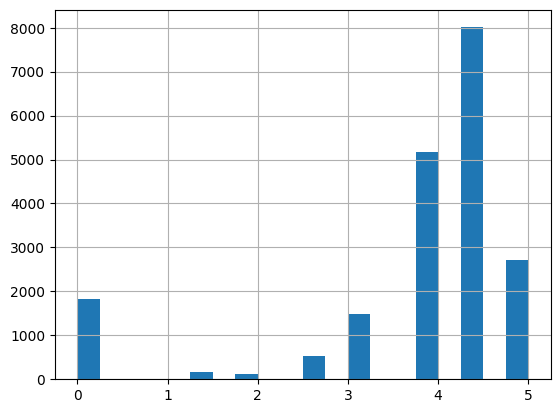

In [ ]:
data.rating.hist(bins=20)

<Axes: xlabel='rating', ylabel='Density'>

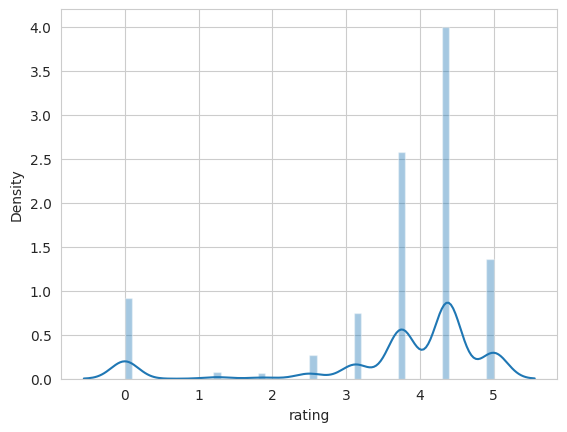

In [ ]:
sb.set_style("whitegrid")
sb.distplot(data.rating)

<Axes: ylabel='rating'>

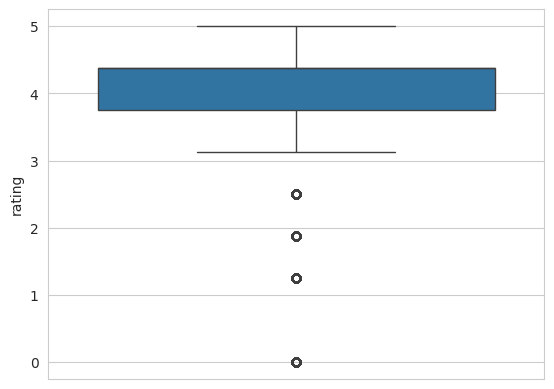

In [ ]:
sb.set_style("whitegrid")
sb.boxplot(data=data['rating'])

In [ ]:
data.rating.isnull().sum()

0

Text(0, 0.5, 'Frequency')

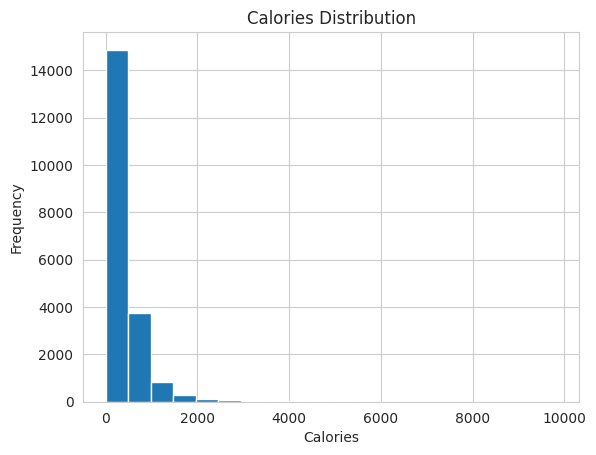

In [ ]:
data.calories.hist(bins=20)
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")

<Axes: xlabel='calories', ylabel='Density'>

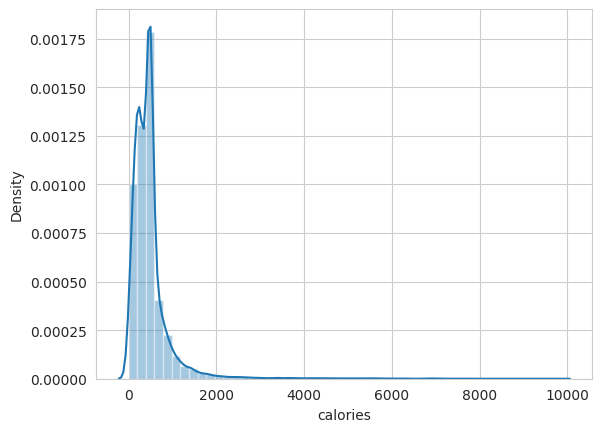

In [ ]:
sb.set_style("whitegrid")
sb.distplot(data.calories)

<Axes: ylabel='calories'>

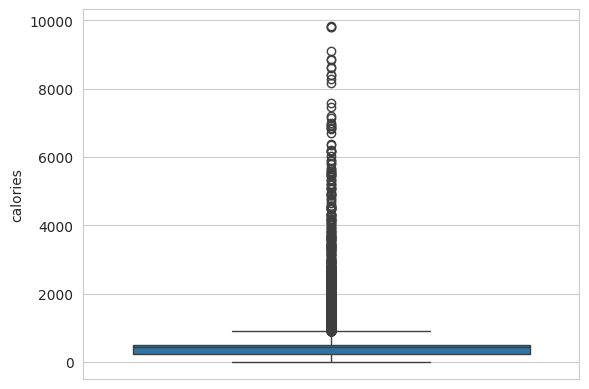

In [ ]:
sb.set_style("whitegrid")
sb.boxplot(data=data['calories'])

In [ ]:
data.calories.isnull().sum()

0

Text(0, 0.5, 'Density')

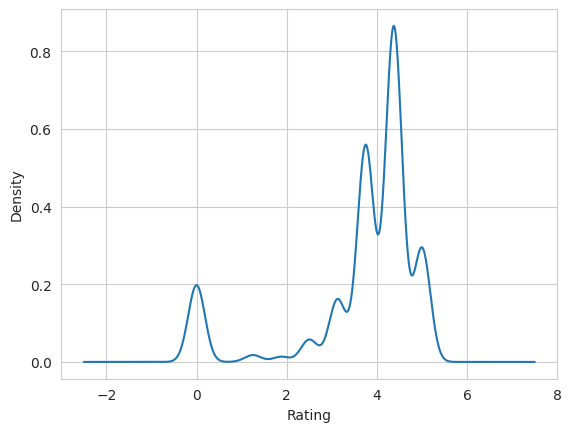

In [ ]:
data['rating'].plot.kde()
plt.xlabel('Rating')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

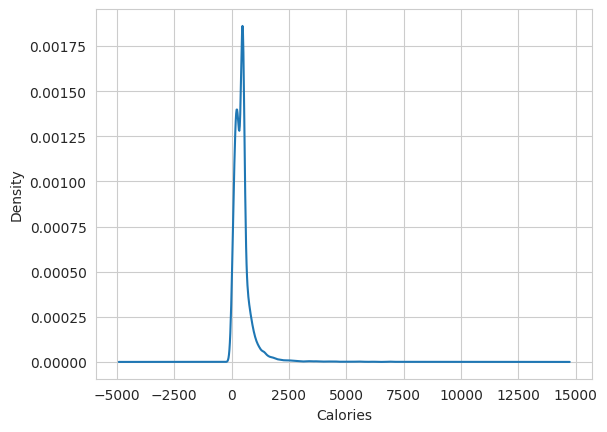

In [ ]:
data['calories'].plot.kde()
plt.xlabel('Calories')
plt.ylabel('Density')


<Axes: xlabel='calories', ylabel='rating'>

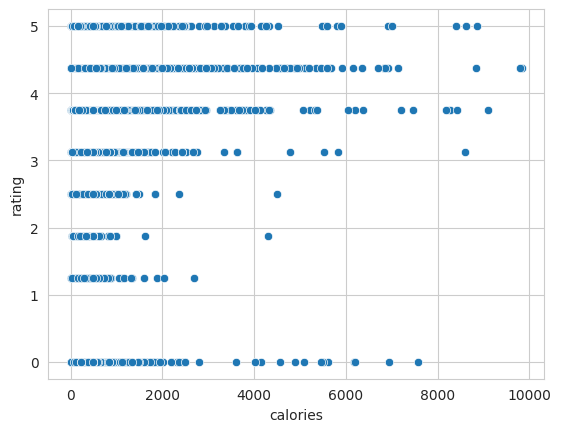

In [ ]:
sb.scatterplot(x=data['calories'],y=data['rating'])

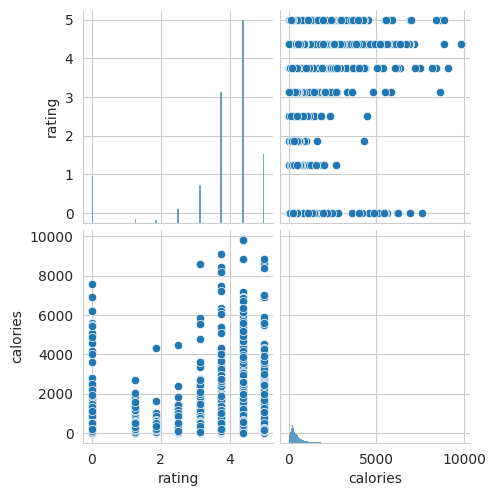

In [ ]:
sb.pairplot(data=data.iloc[:,1:3])

In [ ]:
print(data)

                                             title  rating    calories  \
0                  Lentil, Apple, and Turkey Wrap    2.500  426.000000   
1      Boudin Blanc Terrine with Red Onion Confit    4.375  403.000000   
2                    Potato and Fennel Soup Hodge    3.750  165.000000   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000  487.900654   
4                        Spinach Noodle Casserole    3.125  547.000000   
...                                            ...     ...         ...   
20047                              Parmesan Puffs    3.125   28.000000   
20048              Artichoke and Parmesan Risotto    4.375  671.000000   
20049                       Turkey Cream Puff Pie    4.375  563.000000   
20050     Snapper on Angel Hair with Citrus Cream    4.375  631.000000   
20051  Baked Ham with Marmalade-Horseradish Glaze    4.375  560.000000   

          protein         fat       sodium  #cakeweek  #wasteless  \
0       30.000000    7.000000   559.000000

In [ ]:
count=0;
for j in data.iloc[:,6:].columns:
  if len(data[data[j]==1])<10:
         data=data.drop(columns=j)
         print(j)
         count+=1
print(count)

#cakeweek
#wasteless
30 days of groceries
alabama
alaska
anthony bourdain
apple juice
arizona
aspen
atlanta
australia
beverly hills
biscuit
boston
bran
brooklyn
brownie
buffalo
bulgaria
burrito
cambridge
camping
canada
caviar
chicago
chili
cobbler/crumble
columbus
cook like a diner
cookbook critic
costa mesa
cranberry sauce
crêpe
cr��me de cacao
cuba
cupcake
custard
dallas
denver
digestif
dominican republic
dorie greenspan
eau de vie
egg nog
egypt
emeril lagasse
england
entertaining
epi + ushg
epi loves the microwave
flat bread
frankenrecipe
freezer food
friendsgiving
frittata
fritter
germany
grains
grand marnier
granola
grappa
guam
haiti
hamburger
hawaii
healdsburg
hollywood
house cocktail
houston
hummus
iced coffee
idaho
illinois
indiana
iowa
israel
italy
jamaica
japan
juicer
kansas
kansas city
kentucky
kitchen olympics
labor day
lancaster
las vegas
lasagna
lingonberry
london
long beach
louisiana
louisville
lychee
macaroni and cheese
maine
marinade
marscarpone
marshmallow
martini
mea

In [ ]:
print(data.columns.tolist())

['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '22-minute meals', '3-ingredient recipes', 'advance prep required', 'alcoholic', 'almond', 'amaretto', 'anchovy', 'anise', 'anniversary', 'aperitif', 'appetizer', 'apple', 'apricot', 'artichoke', 'arugula', 'asian pear', 'asparagus', 'avocado', 'back to school', 'backyard bbq', 'bacon', 'bake', 'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean', 'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer', 'beet', 'bell pepper', 'berry', 'birthday', 'bitters', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'boil', 'bok choy', 'bon appétit', 'bon app��tit', 'bourbon', 'braise', 'brandy', 'bread', 'breadcrumbs', 'breakfast', 'brie', 'brine', 'brisket', 'broccoli', 'broccoli rabe', 'broil', 'brown rice', 'brunch', 'brussel sprout', 'buffet', 'bulgur', 'butter', 'buttermilk', 'butternut squash', 'butterscotch/caramel', 'cabbage', 'cake', 'california', 'calvados', 'campari', 'candy', 'candy thermometer', 'cantaloupe',

In [ ]:
data_sorted=data.sort_values(by=['rating','calories'],ascending=[False,True])
data_sorted.reset_index(drop=True,inplace=True)
data_sorted.lunch.unique()

array([0., 1.])

In [ ]:
breakfast=data[data['title'].str.contains('Breakfast')]
breakfast.shape

(25, 513)

In [ ]:
lunch=data[data['lunch']==1.0]
lunch.shape

(1359, 513)

In [ ]:
dinner=data[data['dinner']==1.0]
dinner.shape

(2699, 513)

In [ ]:
print(breakfast['title'].sample())
print(lunch['title'].sample())
print(dinner['title'].sample())

13957    Breakfast Souffles with Sauteed Pears 
Name: title, dtype: object
16475    New England Seafood Chowder 
Name: title, dtype: object
11024    Roast Chicken with Potatoes and Onions 
Name: title, dtype: object


In [ ]:
veg=data[data['vegetarian']==1.0]
veg.shape

(6843, 513)

In [ ]:
nonveg=data[data['vegetarian']==0.0]
nonveg.shape

(13188, 513)

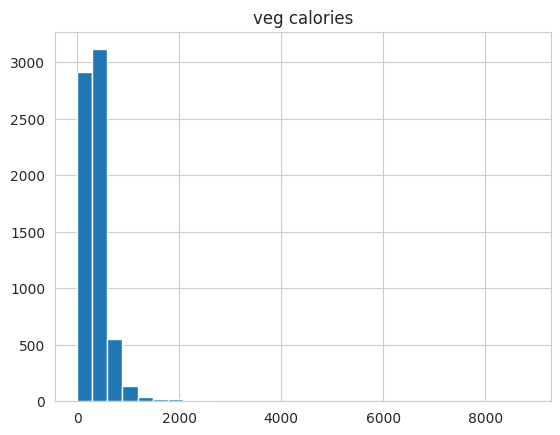

In [ ]:
veg.calories.hist(bins=30)
plt.title('veg calories')
plt.show()

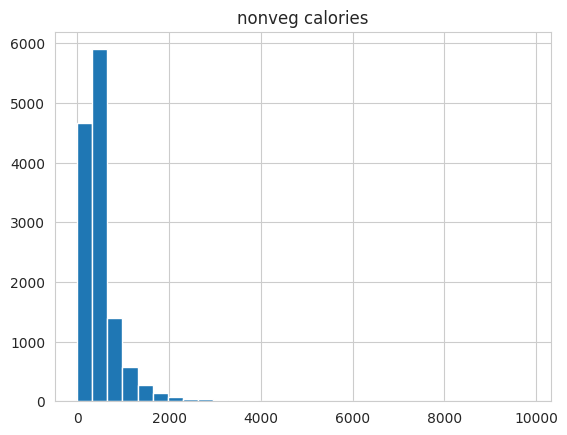

In [ ]:
nonveg.calories.hist(bins=30)
plt.title('nonveg calories')
plt.show()

(array([[6.6510e+03, 1.2600e+02, 2.9000e+01, 1.0000e+01, 1.5000e+01,
         5.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00],
        [1.1951e+04, 9.7800e+02, 1.4200e+02, 4.9000e+01, 2.1000e+01,
         2.2000e+01, 1.0000e+01, 6.0000e+00, 4.0000e+00, 5.0000e+00]]),
 array([   0. ,  983.1, 1966.2, 2949.3, 3932.4, 4915.5, 5898.6, 6881.7,
        7864.8, 8847.9, 9831. ]),
 <a list of 2 BarContainer objects>)

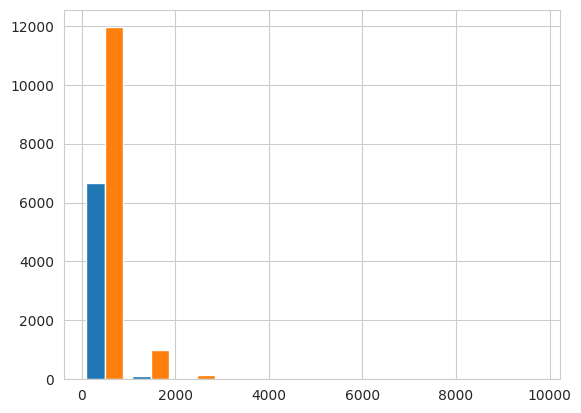

In [ ]:
  plt.hist([veg['calories'],nonveg['calories']])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20031 entries, 0 to 20051
Columns: 513 entries, title to turkey
dtypes: float64(512), object(1)
memory usage: 78.6+ MB


In [ ]:
data = data[data['calories'] < 10000].dropna()

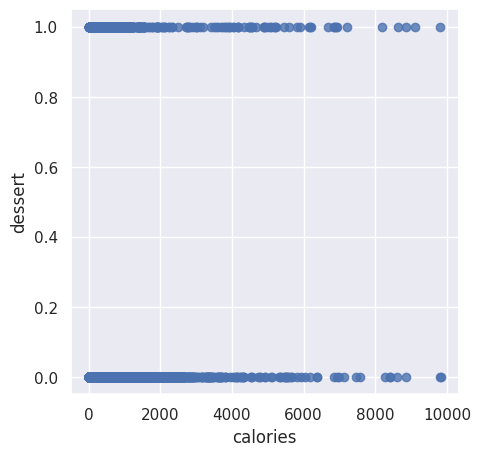

In [ ]:
sb.set(style="darkgrid")
g = sb.regplot(x="calories", y="dessert", data=data, fit_reg=False)
g.figure.set_size_inches(5, 5)


In [ ]:
data = data[:][:500]

In [ ]:
data.drop("title", inplace = True, axis=1)

y = data.dessert.values
X = data.drop(["dessert"], axis = 1)

In [ ]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [ ]:
loj_model.intercept_
loj_model.coef_

array([[-2.07145429e-01,  1.67041183e-03,  6.55988305e-03,
        -4.98472740e-03, -2.78559277e-03, -1.65280779e-02,
         0.00000000e+00, -8.80157689e-02, -3.91893684e-01,
        -6.60455239e-01,  2.39958795e-02,  0.00000000e+00,
        -2.57956319e-01,  1.97319929e-01, -1.43270569e-02,
        -7.88746584e-01,  3.51083055e-01,  2.59731506e-01,
        -2.01517975e-02, -5.83729426e-02, -1.92606071e-02,
        -1.98812960e-01, -7.82802165e-02, -2.84779809e-01,
        -4.82256566e-01, -1.96131905e-01,  1.36177023e+00,
        -1.57429997e-01,  0.00000000e+00, -2.03172152e-01,
         0.00000000e+00, -1.47797989e-02, -2.81046331e-01,
        -2.29928162e-01, -1.26419045e-01,  0.00000000e+00,
        -5.91538967e-02,  1.16701267e-01, -5.74145343e-02,
        -3.38974484e-01,  8.62777050e-01,  1.53380447e-01,
        -1.09837862e-01,  6.90809390e-01,  2.66454625e-01,
        -9.90692760e-02,  6.20294770e-01,  1.68266597e-01,
        -3.14488621e-02, -2.17864609e-01,  0.00000000e+0

In [ ]:
y_pred = loj_model.predict(X)
confusion_matrix(y, y_pred)

array([[414,   0],
       [  2,  84]])

In [ ]:
accuracy_score(y, y_pred)

0.996

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      0.98      0.99        86

    accuracy                           1.00       500
   macro avg       1.00      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X,y)
knn_model

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(X)
accuracy_score(y,y_pred)

0.88

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       414
         1.0       0.77      0.43      0.55        86

    accuracy                           0.88       500
   macro avg       0.83      0.70      0.74       500
weighted avg       0.87      0.88      0.87       500



In [ ]:
knn_params={"n_neighbors":np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print("Best score:"+str(knn_cv.best_score_))
print("Best parameters:"+str(knn_cv.best_params_))

Best score:0.8320000000000001
Best parameters:{'n_neighbors': 4}


In [ ]:
knn=KNeighborsClassifier(11)
knn_tuned=knn.fit(X,y)
knn_tuned.score(X,y)


0.844

In [ ]:
svm_model = SVC(kernel = "linear").fit(X, y)
svm_model


SVC(kernel='linear')

In [ ]:
y_pred=svm_model.predict(X)
accuracy_score(y,y_pred)

1.0

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      1.00      1.00        86

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X, y)
nb_model
y_pred = nb_model.predict(X)
accuracy_score(y, y_pred)

0.97

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       414
         1.0       0.85      1.00      0.92        86

    accuracy                           0.97       500
   macro avg       0.93      0.98      0.95       500
weighted avg       0.97      0.97      0.97       500



In [ ]:
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}
nb = GaussianNB()
nb_cv = GridSearchCV(nb, nb_params, cv=10)
nb_cv.fit(X, y)
print("Best score:", nb_cv.best_score_)
print("Best parameters:", nb_cv.best_params_)
nb_tuned = GaussianNB(**nb_cv.best_params_)
nb_tuned.fit(X, y)
print("Tuned model score:", nb_tuned.score(X, y))


Best score: 0.916
Best parameters: {'var_smoothing': 2.310129700083158e-09}
Tuned model score: 0.964


In [ ]:
rf_model = RandomForestClassifier().fit(X, y)
rf_model
y_pred = rf_model.predict(X)
accuracy_score(y, y_pred)

1.0

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      1.00      1.00        86

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
rf_params = {"max_depth": [2,5,8,10],
              "max_features": [2,5,8],
              "n_estimators": [10,50,100],
              "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()
rf_cv = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2)
rf_cv.fit(X, y)
print("Best score:", rf_cv.best_score_)
print("Best parameters:", rf_cv.best_params_)
rf_tuned = RandomForestClassifier(**rf_cv.best_params_)
rf_tuned.fit(X, y)
print("Tuned model score:", rf_tuned.score(X, y))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best score: 0.874
Best parameters: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 10}
Tuned model score: 0.904


In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(X,y)
ada_model
y_pred = ada_model.predict(X)
accuracy_score(y, y_pred)

1.0

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      1.00      1.00        86

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
ada_params = {"n_estimators": [50, 100, 200],
              "learning_rate": [0.1, 0.5, 1]}

ada_model = AdaBoostClassifier()
ada_cv = GridSearchCV(ada_model, ada_params, cv=10, n_jobs=-1, verbose=2)
ada_cv.fit(X, y)
print("Best score:", ada_cv.best_score_)
print("Best parameters:", ada_cv.best_params_)
ada_tuned = AdaBoostClassifier(**ada_cv.best_params_)
ada_tuned.fit(X, y)
print("Tuned model score:", ada_tuned.score(X, y))


Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best score: 0.958
Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Tuned model score: 0.992


In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc_model = dtc.fit(X,y)
dtc_model
y_pred = dtc_model.predict(X)
accuracy_score(y, y_pred)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       414
         1.0       1.00      1.00      1.00        86

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



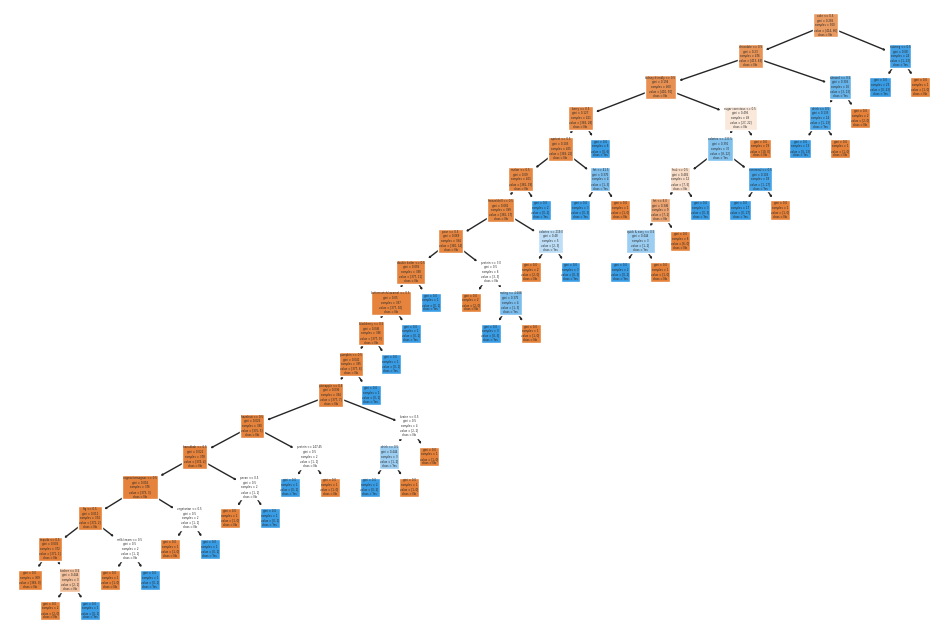

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dtc_model,
              feature_names=X.columns,
              class_names=['No', 'Yes'],
              filled=True);


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtc = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=10)
grid_search.fit(X, y)
print("Best score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
dtc_tuned = tree.DecisionTreeClassifier(**grid_search.best_params_)
dtc_tuned.fit(X, y)
print("Tuned model score:", dtc_tuned.score(X, y))


Best score: 0.9179999999999999
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Tuned model score: 0.982


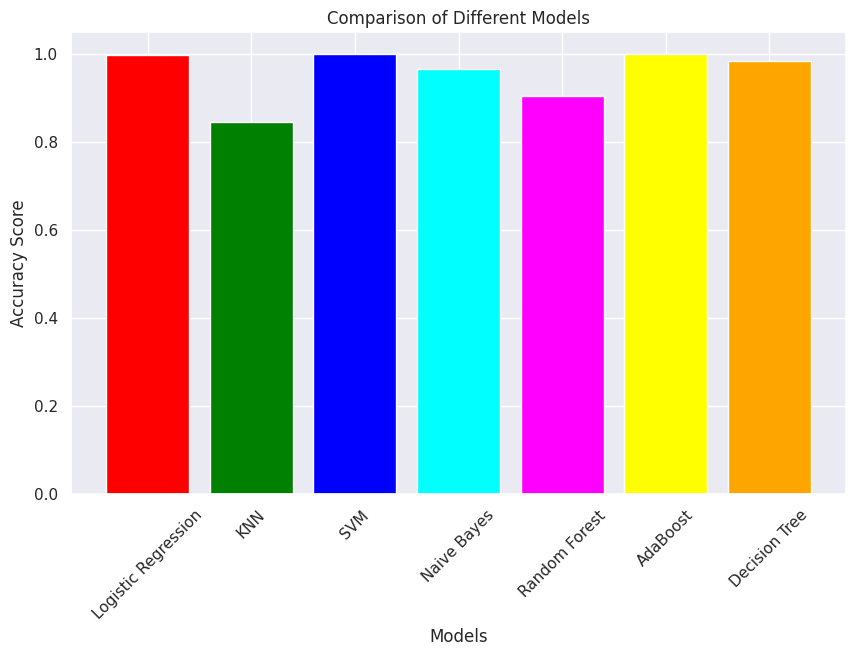

In [ ]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Random Forest', 'AdaBoost', 'Decision Tree']
scores = [loj_model.score(X, y), knn_tuned.score(X, y), svm_model.score(X, y), nb_tuned.score(X, y), rf_tuned.score(X, y), ada_model.score(X, y), dtc_tuned.score(X, y)]

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Different Models')
plt.xticks(rotation=45)
plt.show()
